# Imports

In [1]:
#DATA FRAMEWORK for reading and using the values from the csv
import pandas as pd
import numpy as np

#Python DECISION TREE TOOLS
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn.model_selection import train_test_split

#GRAPHIC TOOL FOR PLOTING
from matplotlib import pyplot as plt

#GRAPHIC TOOLS for making an image of the decission tree
import graphviz
import pydotplus
import io
import imageio

#with this, our output is displayed on the sreen
%matplotlib inline

# Connection to the CSV

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Cleaning the Data

In [4]:
address = 'Telco-Customer-Churn.csv'
data = pd.read_csv(address)

#Assigning number as an string
data['gender'] = data['gender'].replace(to_replace = ['Male','Female'],value = ['1','0'])
data['Partner'] = data['Partner'].replace(to_replace = ['Yes','No'],value = ['1','0'])
data['Dependents'] = data['Dependents'].replace(to_replace = ['Yes','No'],value = ['1','0'])
data['PhoneService'] = data['PhoneService'].replace(to_replace = ['Yes','No'],value = ['1','0'])
data['MultipleLines'] = data['MultipleLines'].replace(to_replace = ['Yes','No','No phone service'],value = ['1','0','0'])
#data['InternetService'] = data['InternetService'].replace(to_replace = ['Fiber optic','DSL','No'],value = ['3','2','0'])
data['InternetService'] = data['InternetService'].replace(to_replace = ['Fiber optic','DSL','No'],value = ['2','1','0'])
data['OnlineSecurity'] = data['OnlineSecurity'].replace(to_replace = ['Yes','No','No internet service'],value = ['1','0','0'])
data['OnlineBackup'] = data['OnlineBackup'].replace(to_replace = ['Yes','No','No internet service'],value = ['1','0','0'])
data['DeviceProtection'] = data['DeviceProtection'].replace(to_replace = ['Yes','No','No internet service'],value = ['1','0','0'])
data['TechSupport'] = data['TechSupport'].replace(to_replace = ['Yes','No','No internet service'],value = ['1','0','0'])
data['StreamingTV'] = data['StreamingTV'].replace(to_replace = ['Yes','No','No internet service'],value = ['1','0','0'])
data['StreamingMovies'] = data['StreamingMovies'].replace(to_replace = ['Yes','No','No internet service'],value = ['1','0','0'])
data['Contract'] = data['Contract'].replace(to_replace = ['Two year','One year','Month-to-month'],value = ['2','1','0'])
data['PaperlessBilling'] = data['PaperlessBilling'].replace(to_replace = ['Yes','No'],value = ['1','0'])
data['PaymentMethod'] = data['PaymentMethod'].replace(to_replace = ['Electronic check','Mailed check',"Bank transfer (automatic)","Credit card (automatic)"],value = ['0','1','2','3'])
data['Churn'] = data['Churn'].replace(to_replace = ['Yes','No'],value = ['1','0'])

#Changing the type of the variables
cols = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
#Dealing with the empty value of TotalCharges
data['TotalCharges'] = data['TotalCharges'].replace(np.nan, 0, regex=True)
data.head(20)



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,1,2,0,...,1,0,1,1,0,1,0,99.65,820.50,1
6,1452-KIOVK,1,0,0,1,22,1,1,2,0,...,0,0,1,0,0,1,3,89.10,1949.40,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,1,...,0,0,0,0,0,0,1,29.75,301.90,0
8,7892-POOKP,0,0,1,0,28,1,1,2,0,...,1,1,1,1,0,1,0,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,1,1,...,0,0,0,0,1,0,2,56.15,3487.95,0


# Checking the Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18), object(1)
memory 

In [6]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,1.222916,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.315633,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.778877,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [7]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.010380,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,-0.005209,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.093704,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000132,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.133115,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.179631,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.123844,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.033230,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.340305,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.093720,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004070,0.247398,0.113214,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.344684,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.035851,0.490434,0.468504,0.040102
InternetService,-0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.344684,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.178137,0.905491,0.428963,0.316846
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.163367,0.296594,0.411651,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.096550,0.441780,0.509226,-0.082255


# Plotting 

In this case all the studied variables are binary. 
Reading the legend we will now what category the colors represent.

In the abcissas axis we can see if either they remain in the company (on the left) or they left (the results on the right)

In the ordinates we can see the number of customers

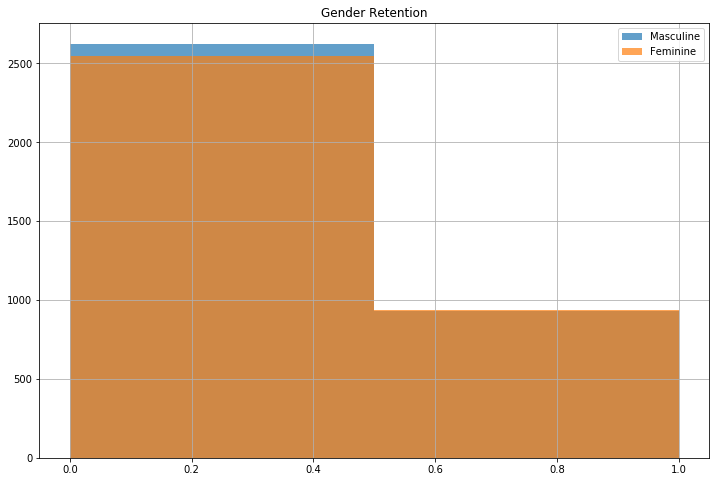

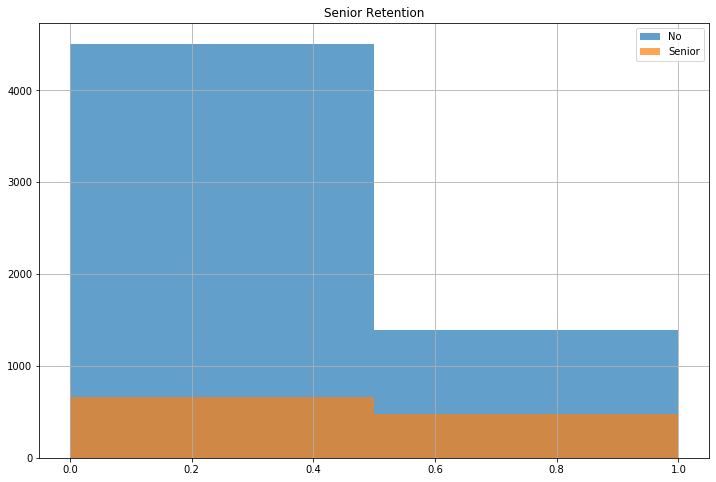

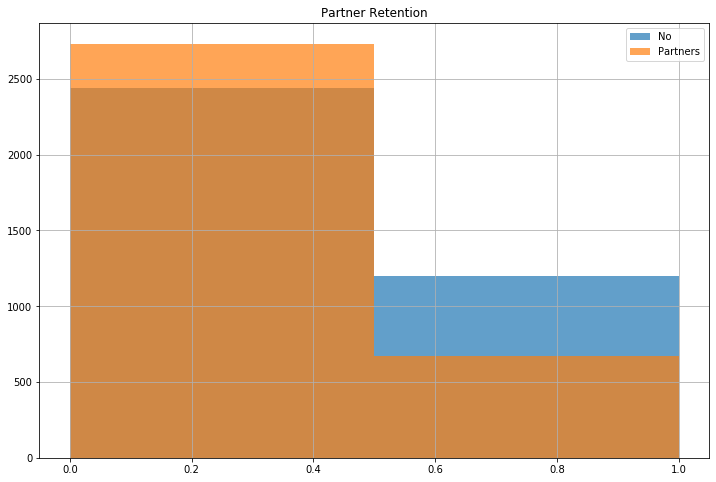

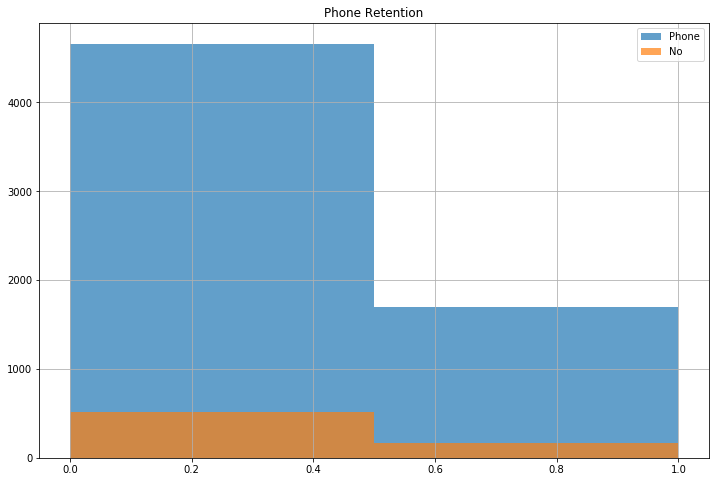

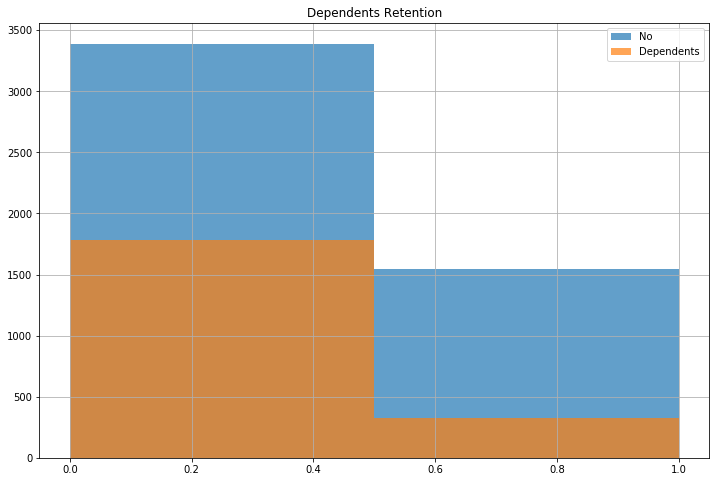

In [8]:
#gender Histogram
pos_gender = data[data['gender']==1]['Churn']
neg_gender = data[data['gender']==0]['Churn']

fig = plt.figure(figsize=(12,8))
plt.title("Gender Retention")


if neg_gender.count()>=pos_gender.count():
    neg_gender.hist(alpha = 0.7,bins = 2, label ='Feminine')
    pos_gender.hist(alpha = 0.7,bins = 2, label ='Masculine')
else:
    pos_gender.hist(alpha = 0.7,bins = 2, label ='Masculine')
    neg_gender.hist(alpha = 0.7,bins = 2, label ='Feminine')
plt.legend(loc='upper right')

#SeniorCitizen Histogram
pos_SeniorCitizen = data[data['SeniorCitizen']==1]['Churn']
neg_SeniorCitizen = data[data['SeniorCitizen']==0]['Churn']

fig = plt.figure(figsize=(12,8))
plt.title("Senior Retention")


if neg_SeniorCitizen.count()>=pos_SeniorCitizen.count():
    neg_SeniorCitizen.hist(alpha = 0.7,bins = 2, label ='No')
    pos_SeniorCitizen.hist(alpha = 0.7,bins = 2, label ='Senior')
else:
    pos_SeniorCitizen.hist(alpha = 0.7,bins = 2, label ='Senior')
    neg_SeniorCitizen.hist(alpha = 0.7,bins = 2, label ='No')
plt.legend(loc='upper right')

#Partner Histogram
pos_partner = data[data['Partner']==1]['Churn']
neg_partner = data[data['Partner']==0]['Churn']

fig = plt.figure(figsize=(12,8))
plt.title("Partner Retention")

if neg_partner.count()>=pos_partner.count():
    neg_partner.hist(alpha = 0.7,bins = 2, label ='No')
    pos_partner.hist(alpha = 0.7,bins = 2, label ='Partners')
else:
    pos_partner.hist(alpha = 0.7,bins = 2, label ='Partners')
    neg_partner.hist(alpha = 0.7,bins = 2, label ='No')
plt.legend(loc='upper right')

#Phone Service Histogram
pos_phoneser = data[data['PhoneService']==1]['Churn']
neg_phoneser = data[data['PhoneService']==0]['Churn']

fig = plt.figure(figsize=(12,8))
plt.title("Phone Retention")

if neg_phoneser.count()>=pos_phoneser.count():
    neg_phoneser.hist(alpha = 0.7,bins = 2, label ='No')
    pos_phoneser.hist(alpha = 0.7,bins = 2, label ='Phone')
else:
    pos_phoneser.hist(alpha = 0.7,bins = 2, label ='Phone')
    neg_phoneser.hist(alpha = 0.7,bins = 2, label ='No')
plt.legend(loc='upper right')

#Dependents Histogram
pos_Dependence = data[data['Dependents']==1]['Churn']
neg_Dependence = data[data['Dependents']==0]['Churn']

fig = plt.figure(figsize=(12,8))
plt.title("Dependents Retention")

if neg_Dependence.count()>=pos_Dependence.count():
    neg_Dependence.hist(alpha = 0.7,bins = 2, label ='No')
    pos_Dependence.hist(alpha = 0.7,bins = 2, label ='Dependents')
else:
    pos_Dependence.hist(alpha = 0.7,bins = 2, label ='Dependents')
    neg_Dependence.hist(alpha = 0.7,bins = 2, label ='No')
plt.legend(loc='upper right')



# HERE THE GRAPHICS WORKS IN DIFFERENT WAY

In the legend we can see that some of them see "yes" if the are staying and "no" if the left

In the abcissas axis would be the value or value assigned to the category of "retention" that we are plotting

In the ordinates we can see the number of customers

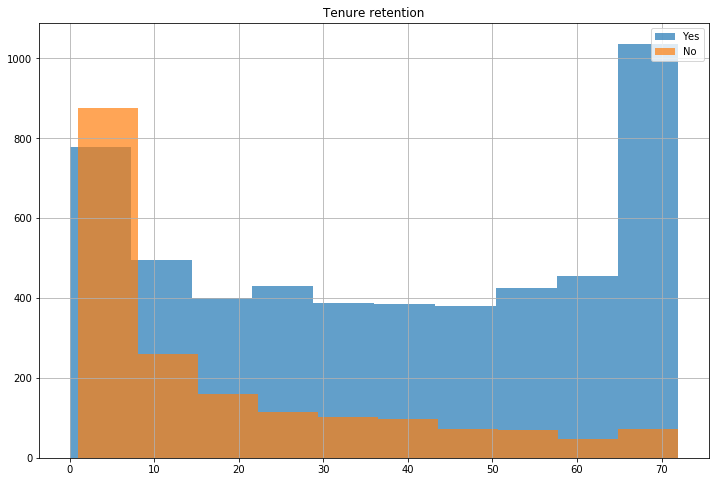

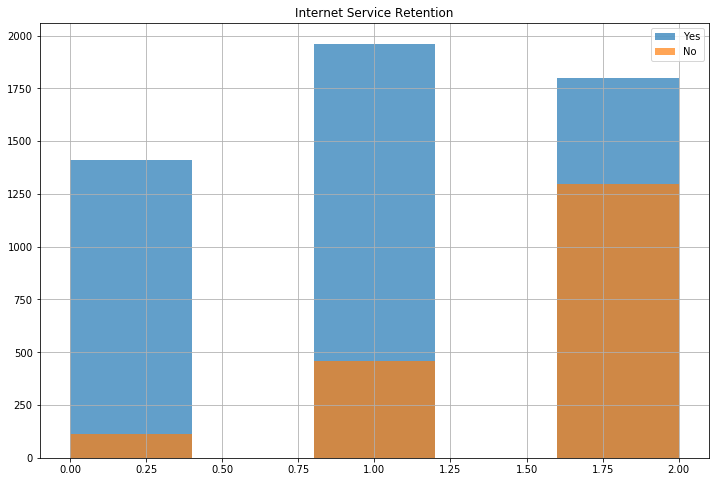

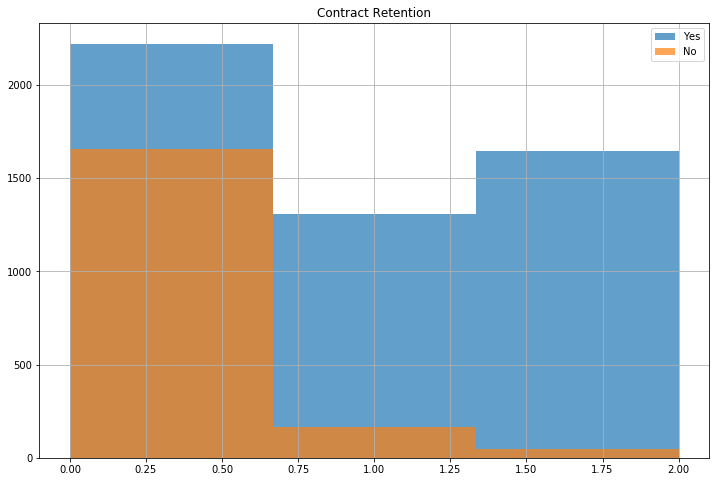

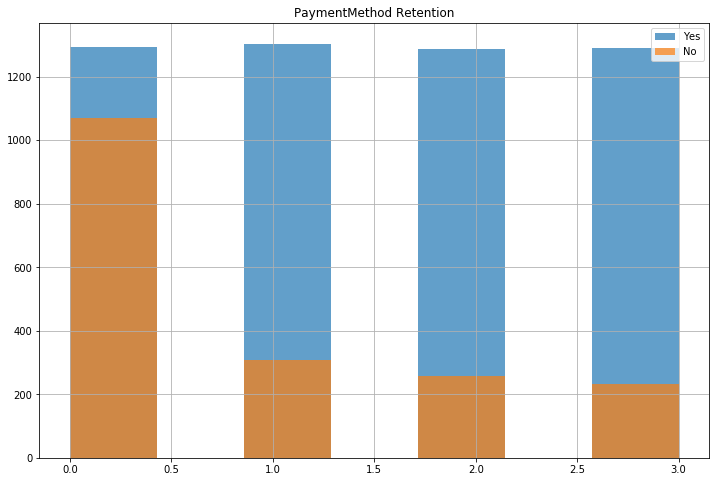

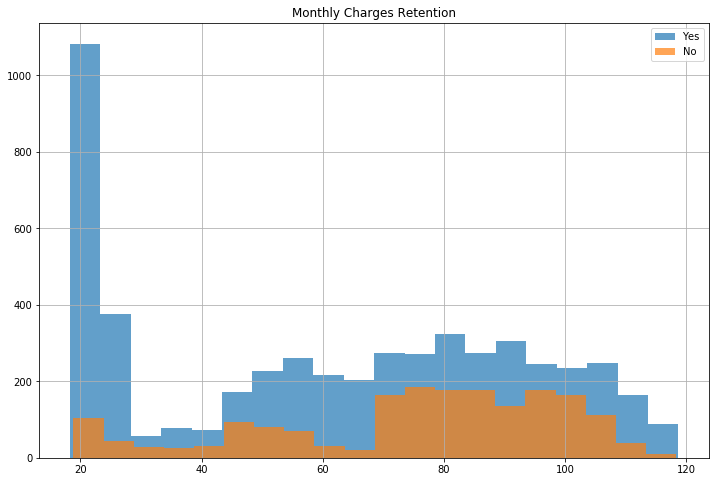

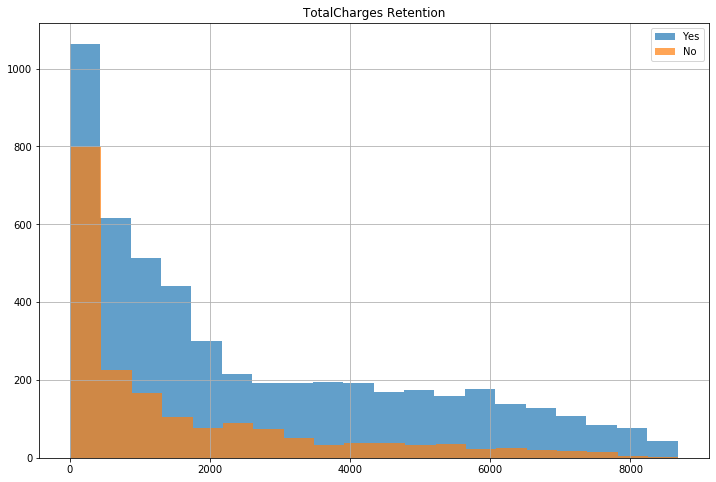

In [9]:
#Tenure Histogram 
#Here we can see with 'yes' and 'no' people that has 
#not leave depending on the tenure in months that they have been
pos_Tenure = data[data['Churn']==1]['tenure']
neg_Tenure = data[data['Churn']==0]['tenure']

fig = plt.figure(figsize=(12,8))
plt.title("Tenure retention")

if neg_Tenure.count()>=pos_Tenure.count():
    neg_Tenure.hist(alpha = 0.7,bins = 10, label ='Yes')
    pos_Tenure.hist(alpha = 0.7,bins = 10, label ='No')
else:
    pos_Tenure.hist(alpha = 0.7,bins = 10, label ='No')
    neg_Tenure.hist(alpha = 0.7,bins = 10, label ='Yes')
plt.legend(loc='upper right')

#Internet Service Histogram
neg_InternetService = data[data['Churn']==0]['InternetService']
pos_InternetService = data[data['Churn']==1]['InternetService']


fig = plt.figure(figsize=(12,8))
plt.title("Internet Service Retention")

neg_InternetService.hist(alpha = 0.7,bins = 5, label ='Yes')
pos_InternetService.hist(alpha = 0.7,bins = 5, label ='No')
    
plt.legend(loc='upper right')

#Contract Histogram
# 0 -- 'Month-to-month'
# 1 -- 'One year'
# 2 -- 'Two year'
neg_Contract = data[data['Churn']==0]['Contract']
pos_Contract = data[data['Churn']==1]['Contract']


fig = plt.figure(figsize=(12,8))
plt.title("Contract Retention")

neg_Contract.hist(alpha = 0.7,bins = 3, label ='Yes')
pos_Contract.hist(alpha = 0.7,bins = 3, label ='No')
    
plt.legend(loc='upper right')

#Payment Method
# 0 -- 'Electronic check'
# 1 -- 'Mailed check'
# 2 -- "Bank transfer (automatic)"
# 3 -- "Credit card (automatic)"

neg_PaymentMethod = data[data['Churn']==0]['PaymentMethod']
pos_PaymentMethod = data[data['Churn']==1]['PaymentMethod']


fig = plt.figure(figsize=(12,8))
plt.title("PaymentMethod Retention")

neg_PaymentMethod.hist(alpha = 0.7,bins = 7, label ='Yes')
pos_PaymentMethod.hist(alpha = 0.7,bins = 7, label ='No')
    
plt.legend(loc='upper right')

#Monthly Charges
#FLOAT
neg_monthly = data[data['Churn']==0]['MonthlyCharges']
pos_monthly = data[data['Churn']==1]['MonthlyCharges']


fig = plt.figure(figsize=(12,8))
plt.title("Monthly Charges Retention")

neg_monthly.hist(alpha = 0.7,bins = 20, label ='Yes')
pos_monthly.hist(alpha = 0.7,bins = 20, label ='No')
    
plt.legend(loc='upper right')

#Total Charges
#FLOAT
neg_monthly = data[data['Churn']==0]['TotalCharges']
pos_monthly = data[data['Churn']==1]['TotalCharges']


fig = plt.figure(figsize=(12,8))
plt.title("TotalCharges Retention")

neg_monthly.hist(alpha = 0.7,bins = 20, label ='Yes')
pos_monthly.hist(alpha = 0.7,bins = 20, label ='No')
    
plt.legend(loc='upper right')


# TRAINING and TESTING

In [238]:
train, test = train_test_split(data, test_size =0.15)

In [239]:
print("Training Size: {}; Test Size:{} ".format (len(train),len(test)))

Training Size: 5986; Test Size:1057 


In [240]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2333,4981-FLTMF,0,0,1,1,57,1,1,1,1,...,0,1,0,0,0,0,2,65.20,3687.85,0
5645,4942-VZZOM,1,0,1,0,64,1,1,1,1,...,0,0,1,0,1,1,3,66.15,4392.50,0
5407,9786-YWNHU,0,0,1,1,63,1,0,1,1,...,1,1,0,0,2,0,1,63.55,4014.20,0
2424,5236-PERKL,0,0,0,0,57,1,1,2,1,...,1,0,1,1,2,1,2,112.95,6465.00,1
5039,4713-LZDRV,0,1,0,0,2,1,0,2,0,...,0,0,0,1,0,1,0,79.60,195.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,0867-LDTTC,1,0,0,0,5,1,0,1,0,...,1,1,1,1,0,0,2,75.15,392.65,0
1134,2208-NQBCT,0,0,1,1,26,1,0,2,1,...,0,0,0,0,0,0,0,81.95,2070.05,0
1949,8466-PZBLH,1,0,1,1,67,1,1,2,1,...,0,1,1,1,2,0,2,104.60,6885.75,0
3913,8749-TZYEC,1,0,1,0,72,1,1,0,0,...,0,0,0,0,2,0,3,24.80,1874.30,0


# Model

In [241]:
c=DecisionTreeClassifier(min_samples_split=500,criterion='entropy')

# Approaches

At the beginning I choose the features that seems more relevant after the analysis
(Important features and Important features 2)

In [242]:
#all features
#features = ['gender','SeniorCitizen', 'Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']

#Important features
#features = ['tenure','InternetService','Contract','PaymentMethod','MonthlyCharges']
#Important features 2
#features = ['tenure','PhoneService','InternetService','Contract','PaymentMethod','MonthlyCharges']


Then I tried to think with a business mind and try to separate the trees by area  

In [243]:
#Customer features
#features = ['gender','SeniorCitizen', 'Partner','Dependents','tenure']
#Products features 
#features = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
#Financial features
#features = ['Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']

Finally I discover the property 'feature_importances' and i prune my tree after adding all the features to the model

In [257]:
#all features
#features = ['gender','SeniorCitizen', 'Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']

#Best Features 
#features = ['Contract','InternetService','tenure','TotalCharges','PhoneService','StreamingMovies','PaymentMethod','MonthlyCharges']
#Best Features without total charges
features = ['InternetService','Contract','tenure','PhoneService','StreamingMovies','PaymentMethod','MonthlyCharges']


# Training

In [258]:
x_train = train[features]
y_train = train['Churn']

x_test = test[features]
y_test = test['Churn']

In [259]:
y_train

2333    0
5645    0
5407    0
2424    1
5039    1
       ..
3114    0
1134    0
1949    0
3913    0
3541    0
Name: Churn, Length: 5986, dtype: int64

In [260]:
dt = c.fit(x_train, y_train)

# Creating a graphic of the Tree

In [261]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

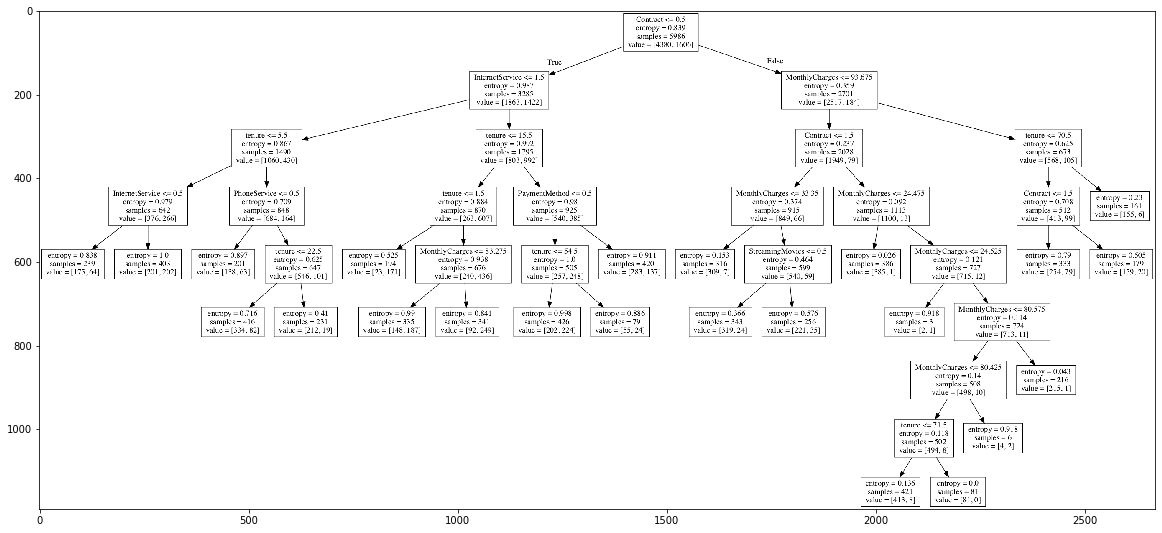

In [262]:
show_tree(dt,features,'dec_tree_new.png')

# Checking the importance of the features

In [263]:
print(c.feature_importances_)

[0.13427921 0.59076613 0.16870724 0.01115881 0.00361173 0.01286988
 0.07860699]


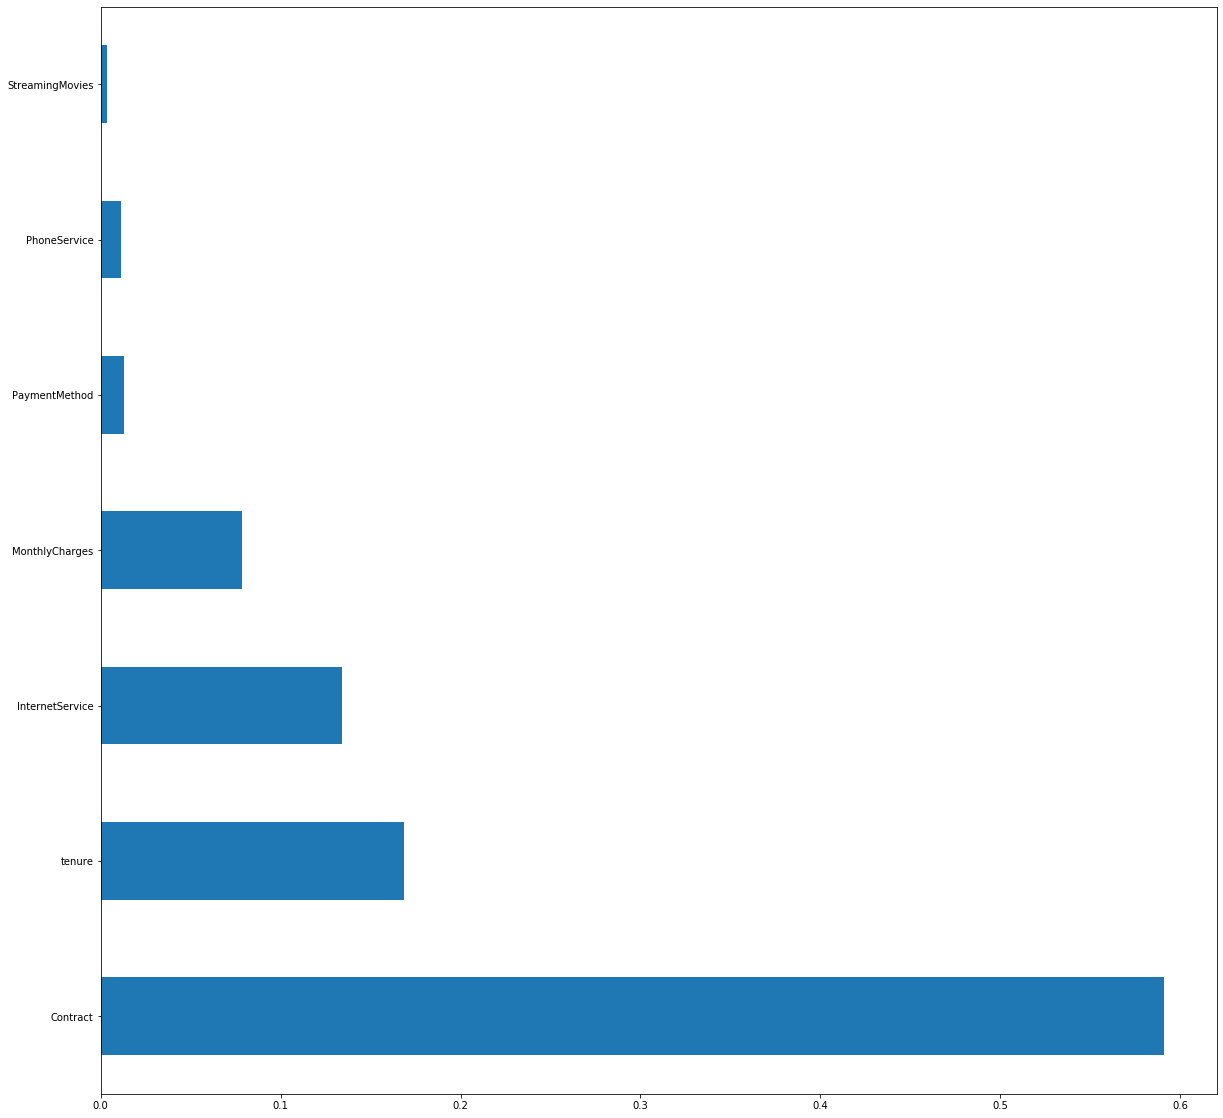

In [264]:
f_importances = pd.Series((c.feature_importances_), index=x_train.columns)
f_importances.nlargest(10).plot(kind='barh')
plt.show()

# Predicting 

In [265]:
y_pred = c.predict(x_test)

In [266]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

# Analysing Performance

In [267]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)*100

In [268]:
print("Accuracy using Decision Tree: ", round(score, 1),"%")

Accuracy using Decision Tree:  80.4 %


In [269]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[669 125]
 [ 82 181]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       794
           1       0.59      0.69      0.64       263

    accuracy                           0.80      1057
   macro avg       0.74      0.77      0.75      1057
weighted avg       0.82      0.80      0.81      1057

